<a href="https://colab.research.google.com/github/Sibin-S-S/Sibin_DSA_Pathshaala/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_iris = sns.load_dataset('iris')
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data_iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
data_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data_iris.shape

(150, 5)

# EDA

In [ ]:
num_cols = data_iris.select_dtypes('float64')
cat_cols = data_iris.select_dtypes('object')

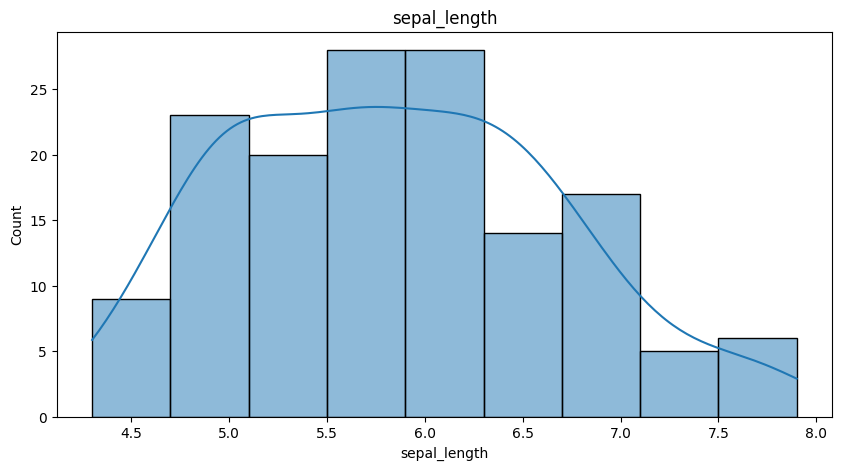

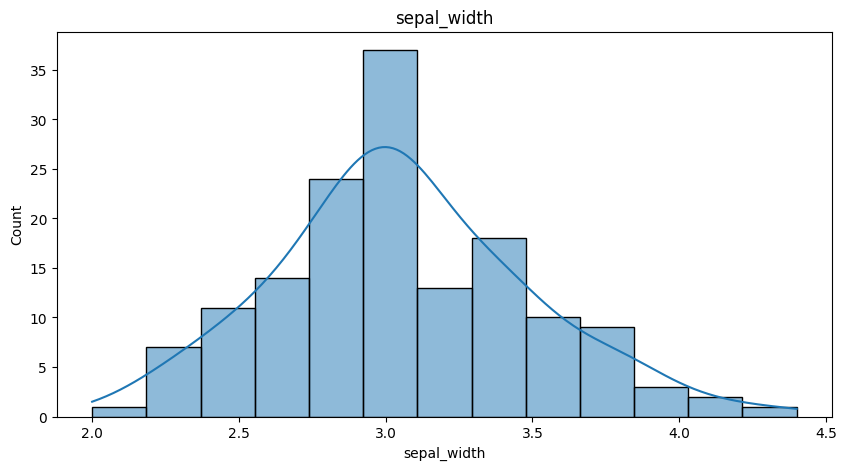

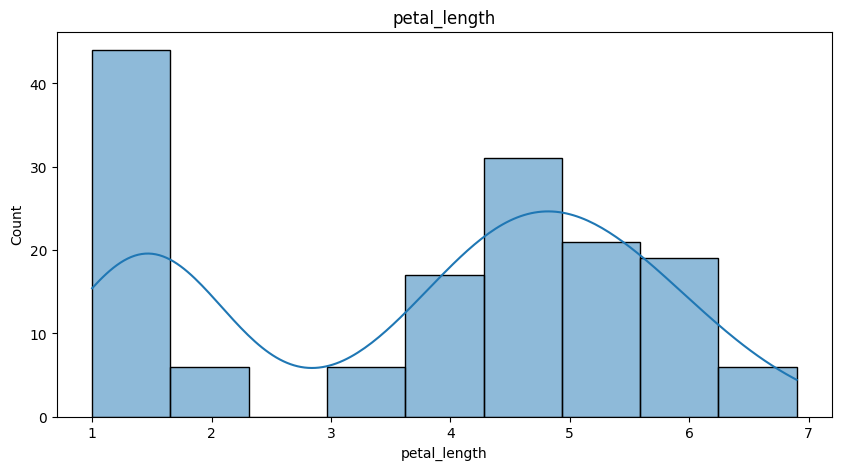

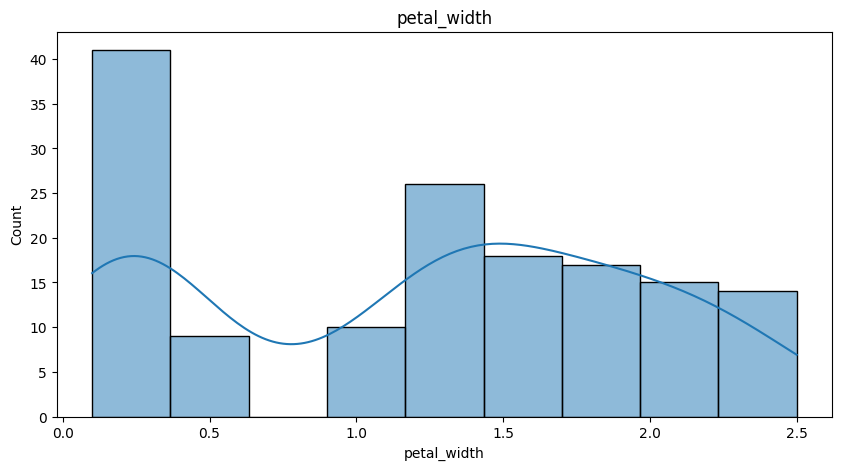

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data_iris,x=i,kde=True)
  plt.title(i)

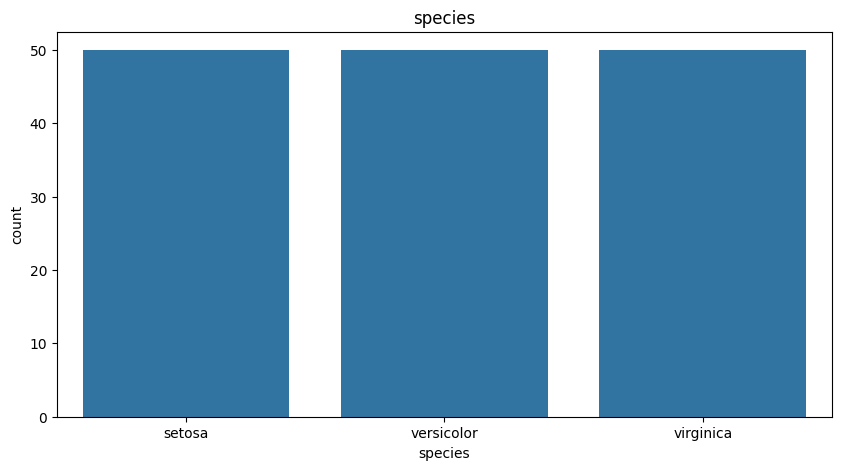

In [ ]:
for i in cat_cols:
 plt.figure(figsize=(10,5))
 sns.countplot(data = data_iris,x=i)
 plt.title(i)

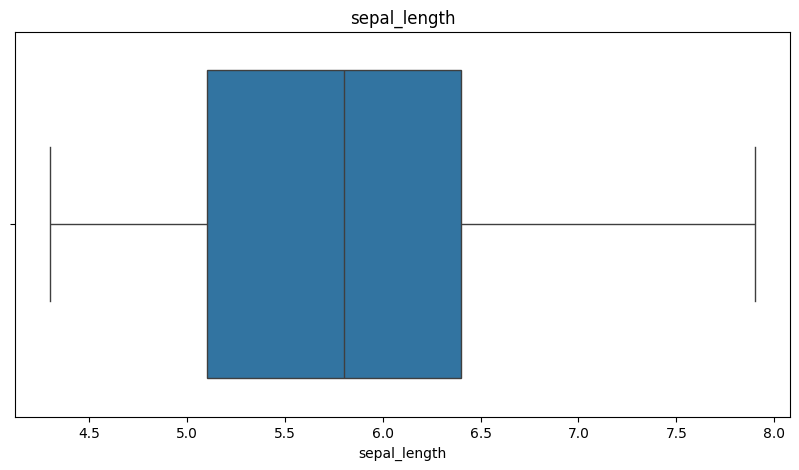

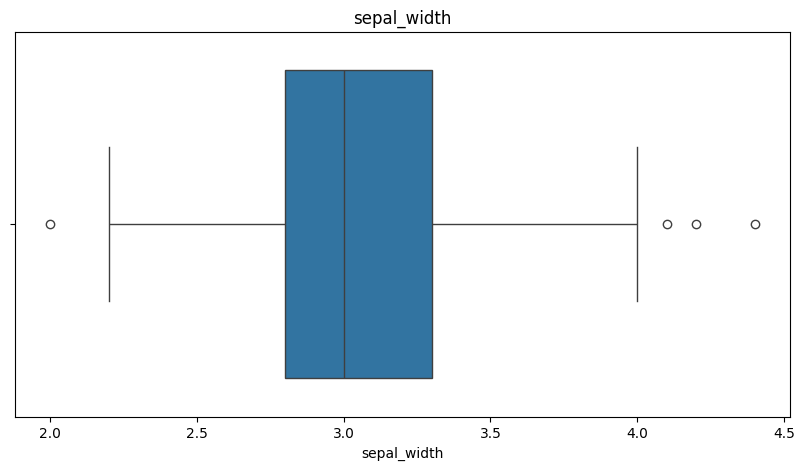

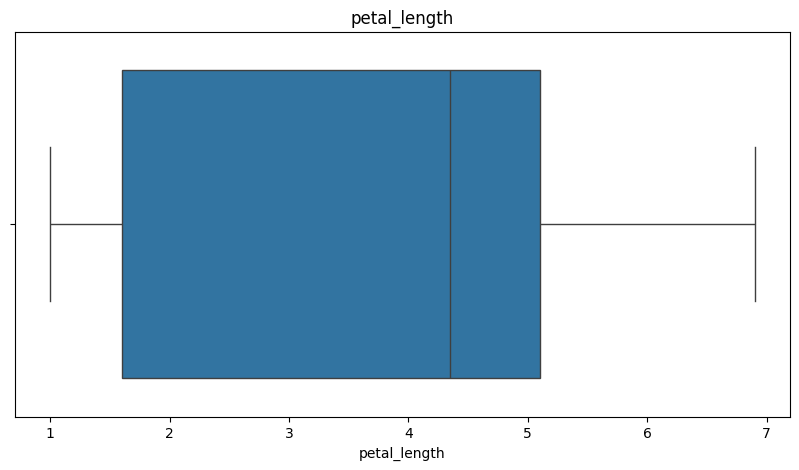

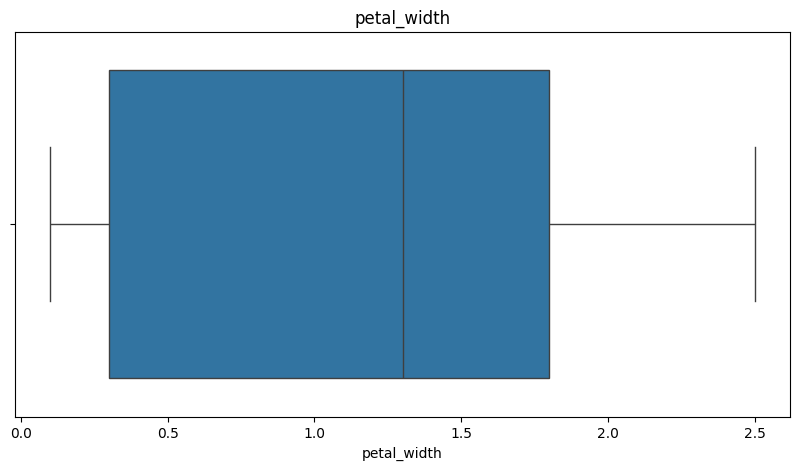

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = data_iris,x=i)
  plt.title(i)

In [ ]:
# drop the column species

data_iris = data_iris.drop('species',axis=1)
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# handiling the outlier of sepal_width

from scipy.stats.mstats import winsorize

Text(0.5, 1.0, 'sepal_width')

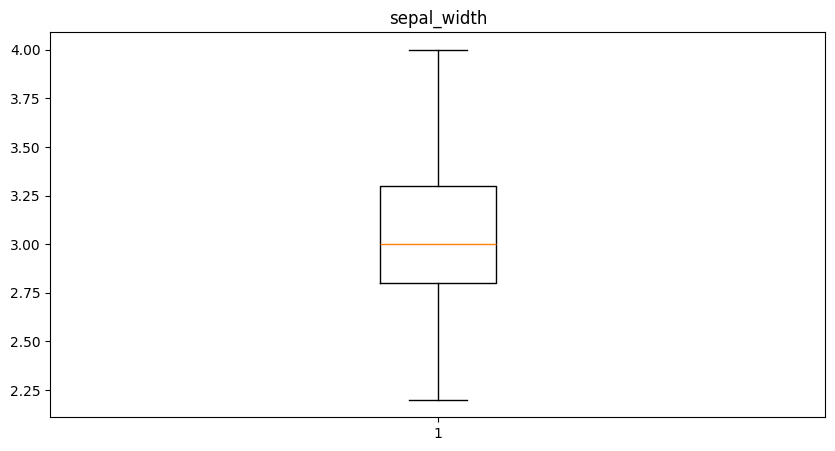

In [ ]:
data_iris['sepal_width'] = winsorize(data_iris['sepal_width'],limits=(0.01,0.02))
plt.figure(figsize=(10,5))
plt.boxplot(data_iris['sepal_width'])
plt.title('sepal_width')

In [ ]:
#skewness
skew_value = data_iris.skew()
print(skew_value)

sepal_length    0.314911
sepal_width     0.197612
petal_length   -0.274884
petal_width    -0.102967
dtype: float64


In [ ]:
data_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.121342,0.871754,0.817941
sepal_width,-0.121342,1.000000,-0.429714,-0.366835
petal_length,0.871754,-0.429714,1.000000,0.962865
petal_width,0.817941,-0.366835,0.962865,1.000000


In [ ]:
# scaling
x = data_iris[['sepal_length','sepal_width']]

Text(0.5, 1.0, 'Scatter plot of sepal length vs Sepal width')

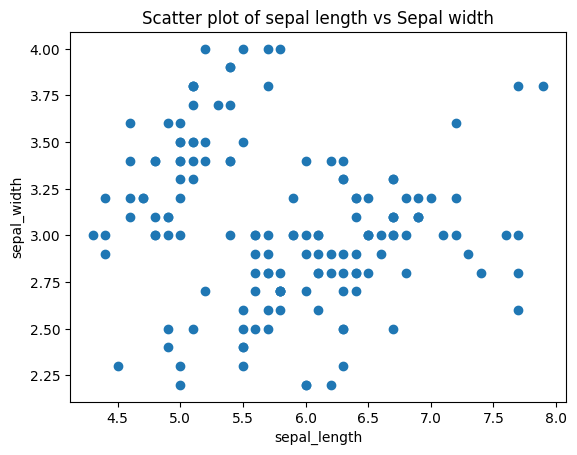

In [ ]:
plt.scatter(x['sepal_length'],x['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter plot of sepal length vs Sepal width')

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(x)

In [ ]:
data_scaled_df = pd.DataFrame(data_scaled, columns=x.columns)
data_scaled_df.describe()

,sepal_length,sepal_width
count,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.394885e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.035928e+00
25%,-9.006812e-01,-6.055336e-01
50%,-5.250608e-02,-1.287355e-01
75%,6.745011e-01,5.864617e-01
max,2.492019e+00,2.255255e+00


In [ ]:
minmax_scale = MinMaxScaler()
data_scaled = minmax_scale.fit_transform(x)

In [ ]:
# clustering

from sklearn.cluster import KMeans


In [ ]:
wcss = []


for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

wcss

[11.301043810013718,
 5.3782421610619515,
 4.488831173603,
 3.3447497723369195,
 2.7448382496273362,
 2.512754965964329,
 2.026918555410066,
 1.5966668755056097,
 1.3757506382506373]

Text(0.5, 0, 'Number of clusters')

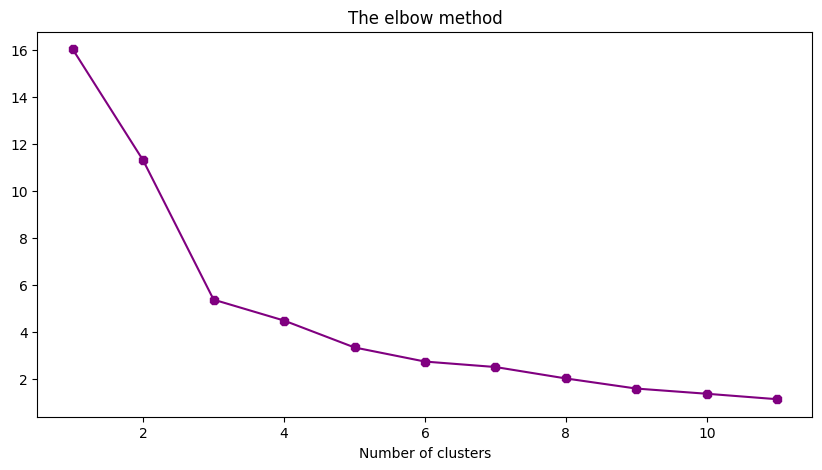

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,12),wcss,color='purple',marker='8')
plt.title('The elbow method')
plt.xlabel('Number of clusters')

In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(data_scaled)

score = silhouette_score(data_scaled,labels)
print('Silhouette Score:',score)

Silhouette Score: 0.4356153138846806


In [ ]:
data_iris_1=data_iris.copy()

In [ ]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(data_scaled)
data_iris_1['Cluster'] = kmeans.predict(data_scaled)
data_iris_1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

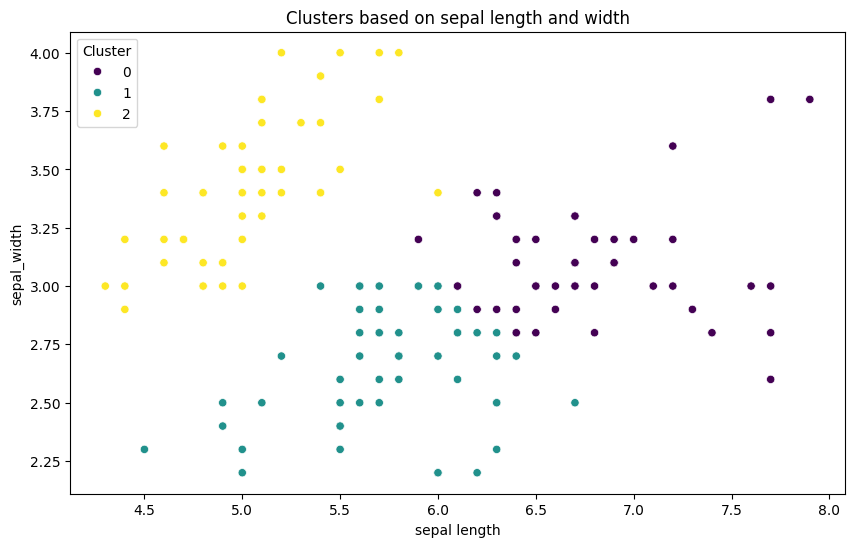

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_iris_1, x='sepal_length', y='sepal_width', hue='Cluster', palette='viridis',)
plt.title('Clusters based on sepal length and width')
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.legend(title='Cluster')
plt.show()

In [ ]:
data_iris_1['Cluster'].value_counts()

,count
Cluster,
1,51
2,50
0,49


In [ ]:
kmeans.cluster_centers_

array([[0.68424036, 0.49433107],
       [0.40305011, 0.24727669],
       [0.20444444, 0.68666667]])

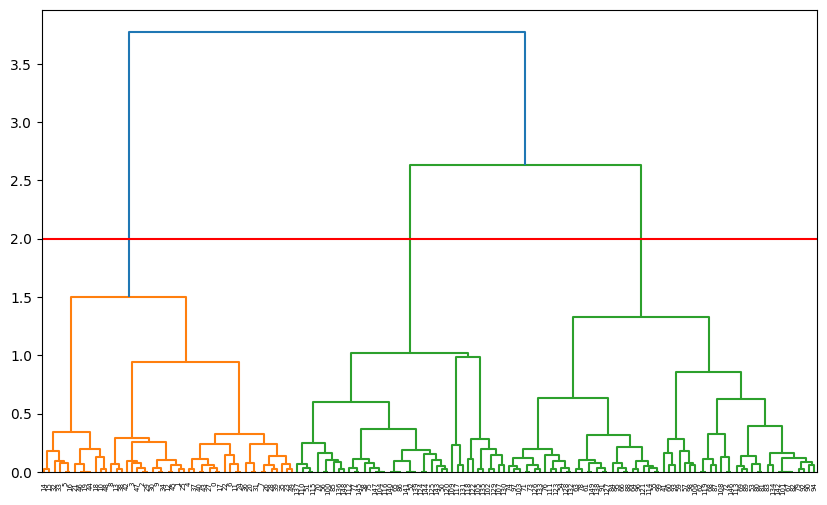

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

mergings = linkage(data_scaled,method='ward')

plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(2.0,color='red')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(data_scaled)
new_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
data_iris_1['agle_cluster'] = new_cluster_labels
data_iris_1

,sepal_length,sepal_width,petal_length,petal_width,Cluster,agle_cluster
0,5.1,3.5,1.4,0.2,2,0
1,4.9,3.0,1.4,0.2,2,0
2,4.7,3.2,1.3,0.2,2,0
3,4.6,3.1,1.5,0.2,2,0
4,5.0,3.6,1.4,0.2,2,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,1,1
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [ ]:
data_iris_1['agle_cluster'].value_counts()

,count
agle_cluster,
1,60
0,49
2,41


In [ ]:
score = silhouette_score(data_scaled,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.44262996112691155
